In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Cleaned algarian forest fire dataset.csv')

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
239,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
240,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [5]:
df = df.drop(['day','month','year'],axis=1)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [7]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

Independent Feature

In [10]:
X = df.drop('FWI',axis = 1)
Y = df['FWI']

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [12]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state= 42)

In [15]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


Checking multicollinearity

<Axes: >

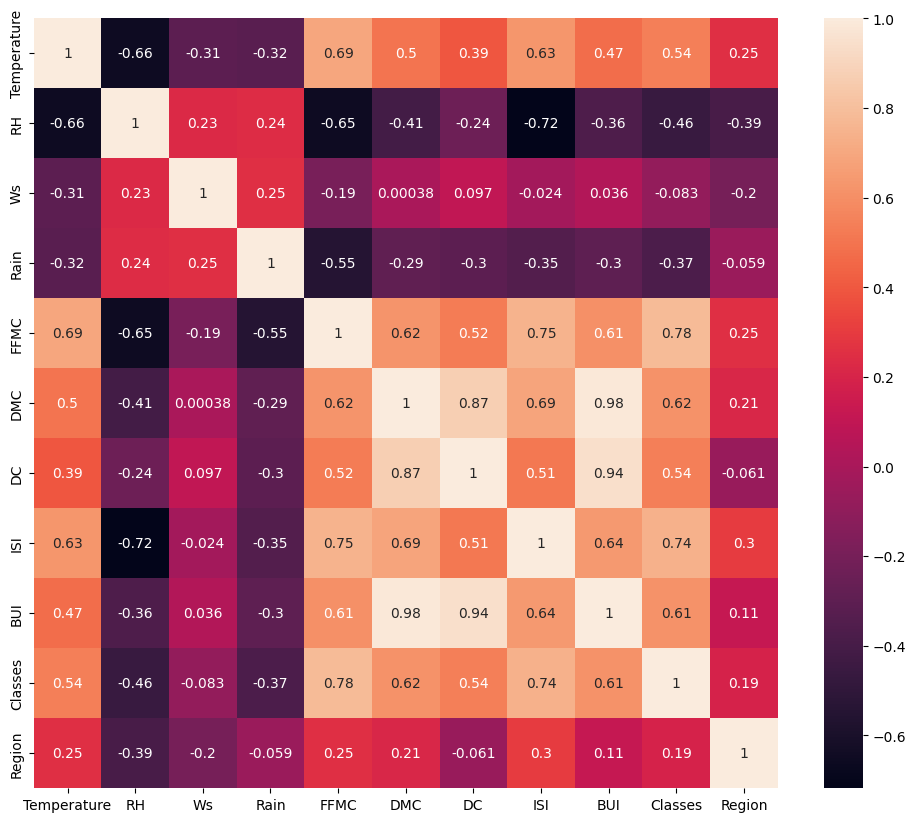

In [16]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

Keeping a features with specfic threshold

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [21]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [22]:
high_corr_feartures = correlation(X_train,0.85)

Dropping these features

In [23]:
X_train.drop(high_corr_feartures,axis=1,inplace=True)
X_test.drop(high_corr_feartures,axis=1,inplace=True)

In [24]:
X_train.shape

(182, 9)

In [26]:
X_test.shape

(61, 9)

Standardization

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train after scaling')

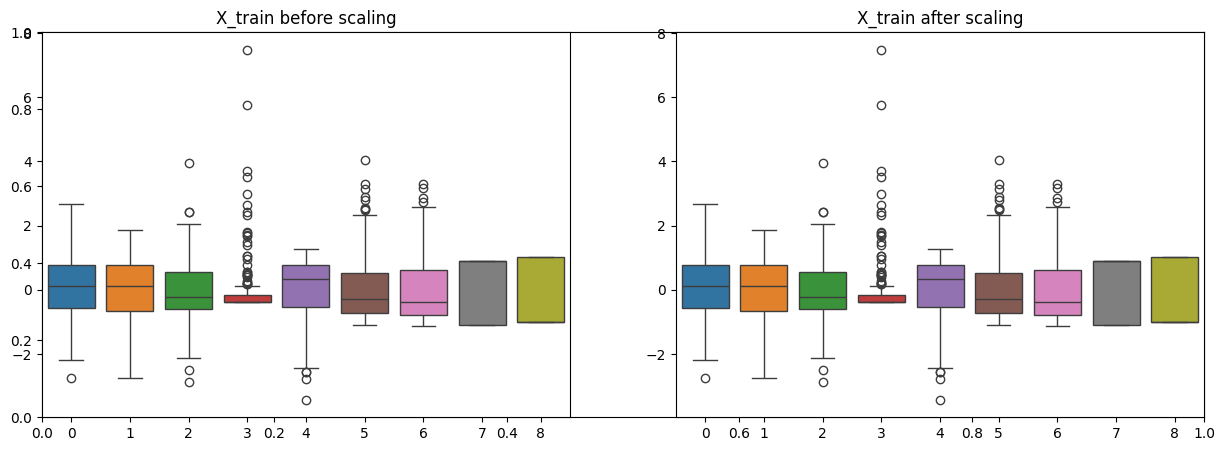

In [49]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

Model building: Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
l_regg = LinearRegression()

In [40]:
l_regg.fit(X_train_scaled,Y_train)

LinearRegression()

In [ ]:
y_pred = l_regg.predict(X_test_scaled)

In [45]:
mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean absolute error:",mae)
print("R2 score:",r2 % 100)

Mean absolute error: 0.5468236465249985
R2 score: 0.9847657384266951


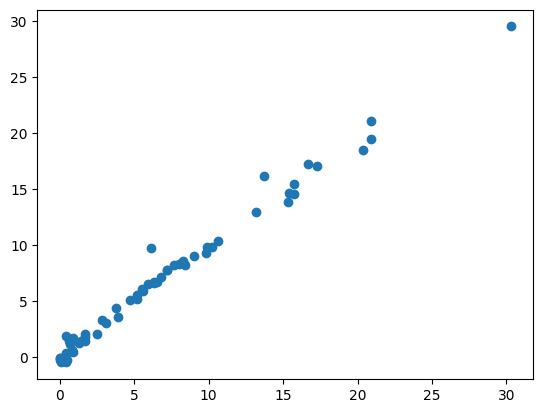

In [53]:
plt.scatter(Y_test,y_pred)

<Axes: xlabel='FWI'>

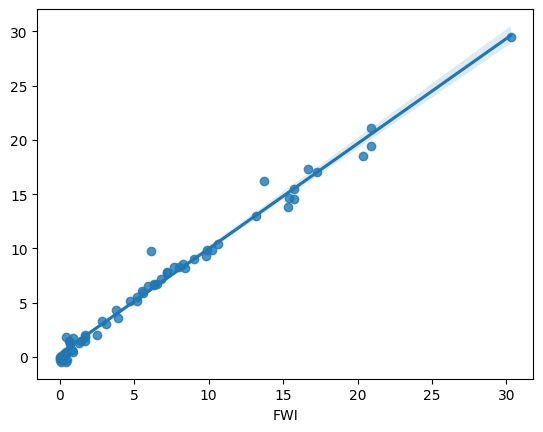

In [55]:
sns.regplot(x = Y_test, y = y_pred)

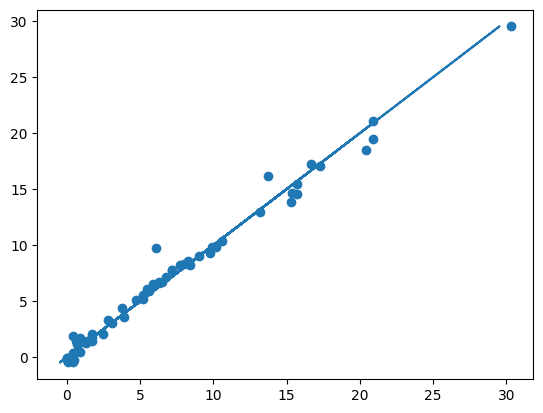

In [61]:
plt.scatter(Y_test, y_pred)
plt.plot(y_pred,l_regg.predict(X_test_scaled))

Model Building : Lasso Regression

In [63]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [64]:
lasso_regg = Lasso()
lasso_regg.fit(X_train_scaled,Y_train)

y_pred = lasso_regg.predict(X_test_scaled)

mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean absolute error:",mae)
print("R2 score:",r2 % 100)

Mean absolute error: 1.133175994914408
R2 score: 0.9492020263112388


Model Building: Ridge regression

In [66]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [67]:
ridge_regg = Ridge()
ridge_regg.fit(X_train_scaled,Y_train)

y_pred = ridge_regg.predict(X_test_scaled)

mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean absolute error:",mae)
print("R2 score:",r2 % 100)  

Mean absolute error: 0.5642305340105684
R2 score: 0.9842993364555513


Model Building:  ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

In [68]:
ridge_regg = Ridge()
ridge_regg.fit(X_train_scaled,Y_train)

y_pred = ridge_regg.predict(X_test_scaled)

mae = mean_absolute_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean absolute error:",mae)
print("R2 score:",r2 % 100)  

Mean absolute error: 0.5642305340105684
R2 score: 0.9842993364555513
